In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import pandas as pd
import os
project_folder_path = '/content/drive/MyDrive/Kool/sissejuhatus_andmeteadusesse/projekt/Project_C4'

# Training data 2013-2019 // 2397 lines
# Test data 2020-2023 // 1460 lines

TO DO patterns, models descriptions

Models used:
- Linear Regression (max R²: 0.785)
- - Training set 2013 - 2019, test set 2020 - 2023
- - MAE: 12,392 RMSE: 16,310 R²: 0.769
- Random Forest Regressor
- - Training 2013 - 2021, test 2022 - 2023
- - MAE: 18,146 RMSE: 22,987 R²: 0.53
- - Training 2013 - 2022, test 2023
- - MAE: 12,650 RMSE: 15,817 R²: 0.76
- CatBoost model (gradient boosted decision tree)
- - Training 2013 - 2022, test 2023
- - MAE: 15,170 RMSE: 17,720 R²: 0.6981
- - Training 2013 - 2021, test 2022 - 2023
- - MAE: 20,798 RMSE: 25,399 R²: 0.4246
- LightGBM model (gradient boosted decision tree)
- - Training set 2013 - 2019, test set 2022 - 2023
- - MAE: 18,866 RMSE: 23,825 R²: 0.4937
- - Training 2013 - 2022, test 2023
- - MAE: 13,464 RMSE: 16,627 R²: 0.7342
- Prophet
- - Training set 2013 - 2019, test set 2020 - 2023
- - MAE: 11,783 RMSE: 15,749 R²: 0.79

# Training data

In [4]:
# training data 2013-2019
df1 = pd.read_csv(os.path.join(project_folder_path, "training_data/citibike_all_daily_by_gender_age.csv"))
df2 = pd.read_csv(os.path.join(project_folder_path, "training_data/weather_with_days.csv"))

In [5]:
# training data 2013-2019
df_bike_day = df1.groupby('date').agg(
    trips=('trips', 'sum'),
    median_duration=('median_duration', 'median')
).reset_index()

# Convert to int
df_bike_day['median_duration'] = df_bike_day['median_duration'].astype(int)

df_bike_day.head()

,date,trips,median_duration
0,2013-06-01,8691,867
1,2013-06-02,15942,813
2,2013-06-03,7585,692
3,2013-06-04,15692,832
4,2013-06-05,15632,797


In [6]:
df2['date'] = pd.to_datetime(df2['time'])
df_weather_day = df2[['date', 'tavg', 'prcp', 'wspd', 'day_name', 'day_of_week', 'is_weekend', 'season']]
df_weather_day.head()

,date,tavg,prcp,wspd,day_name,day_of_week,is_weekend,season
0,2013-06-01,28.1,0.0,17.1,Saturday,5,1,Spring
1,2013-06-02,27.8,0.0,21.1,Sunday,6,1,Spring
2,2013-06-03,23.6,44.6,13.2,Monday,0,0,Spring
3,2013-06-04,20.2,0.0,19.5,Tuesday,1,0,Spring
4,2013-06-05,19.0,0.0,14.2,Wednesday,2,0,Spring


In [7]:
df_bike_day['date'] = pd.to_datetime(df_bike_day['date'])
df_train = df_bike_day.merge(df_weather_day, on='date', how='inner')
df_train.head()

,date,trips,median_duration,tavg,prcp,wspd,day_name,day_of_week,is_weekend,season
0,2013-06-01,8691,867,28.1,0.0,17.1,Saturday,5,1,Spring
1,2013-06-02,15942,813,27.8,0.0,21.1,Sunday,6,1,Spring
2,2013-06-03,7585,692,23.6,44.6,13.2,Monday,0,0,Spring
3,2013-06-04,15692,832,20.2,0.0,19.5,Tuesday,1,0,Spring
4,2013-06-05,15632,797,19.0,0.0,14.2,Wednesday,2,0,Spring


In [8]:
len(df_train)
#2397

2397

In [9]:
#df_train.to_csv("/content/drive/MyDrive/Kool/sissejuhatus_andmeteadusesse/projekt/Project_C4/df_train.csv", index=False)

# Test data

In [10]:
# test data 2020-2023
df3 = pd.read_csv(os.path.join(project_folder_path, "test_data/citibike_all_daily_combined_20to23.csv"))
df4 = pd.read_csv(os.path.join(project_folder_path, "test_data/weather_with_days_20-23.csv"))

In [11]:
# test data 2013-2019
df_bike_day2 = df3.groupby('date').agg(
    trips=('trips', 'sum'),
    median_duration=('median_duration', 'median')
).reset_index()

# Convert to int
df_bike_day2['median_duration'] = df_bike_day2['median_duration'].astype(int)

df_bike_day2.head()

,date,trips,median_duration
0,2020-01-01,18160,542
1,2020-01-02,41614,551
2,2020-01-03,31920,522
3,2020-01-04,29480,526
4,2020-01-05,27636,500


In [12]:
df4['date'] = pd.to_datetime(df4['time'])
df_weather_day2 = df4[['date', 'tavg', 'prcp', 'wspd', 'day_name', 'day_of_week', 'is_weekend', 'season']]
df_weather_day2.head()

,date,tavg,prcp,wspd,day_name,day_of_week,is_weekend,season
0,2020-01-01,4.4,0.0,17.9,Wednesday,2,0,Winter
1,2020-01-02,3.7,0.9,12.6,Thursday,3,0,Winter
2,2020-01-03,7.5,3.0,8.8,Friday,4,0,Winter
3,2020-01-04,8.2,4.5,6.5,Saturday,5,1,Winter
4,2020-01-05,5.7,0.3,7.4,Sunday,6,1,Winter


In [13]:
df_bike_day2['date'] = pd.to_datetime(df_bike_day2['date'])
df_test = df_bike_day2.merge(df_weather_day2, on='date', how='inner')
df_test.head()

,date,trips,median_duration,tavg,prcp,wspd,day_name,day_of_week,is_weekend,season
0,2020-01-01,18160,542,4.4,0.0,17.9,Wednesday,2,0,Winter
1,2020-01-02,41614,551,3.7,0.9,12.6,Thursday,3,0,Winter
2,2020-01-03,31920,522,7.5,3.0,8.8,Friday,4,0,Winter
3,2020-01-04,29480,526,8.2,4.5,6.5,Saturday,5,1,Winter
4,2020-01-05,27636,500,5.7,0.3,7.4,Sunday,6,1,Winter


In [14]:
len(df_test)
#1460

1460

In [15]:
#df_test.to_csv("/content/drive/MyDrive/Kool/sissejuhatus_andmeteadusesse/projekt/Project_C4/df_test.csv", index=False)

# Presentation data

In [16]:
df = pd.read_csv(os.path.join(project_folder_path, "training_data/merged_citibike_weather.csv"))
df.head()

,date,gender,age_group,trips,avg_duration,median_duration,unique_bikes,subscribers,customers,tavg,tmin,tmax,prcp,wspd,coco,weather,day_name,day_of_week,is_weekend,season
0,2013-06-01,Female,18-25,56,4439.1,896.0,49,56,0,28.1,22.2,33.3,0.0,17.1,NaN,Unknown,Saturday,5,1,Spring
1,2013-06-01,Unknown,Unknown,3574,2588.4,1360.0,1898,0,3574,28.1,22.2,33.3,0.0,17.1,NaN,Unknown,Saturday,5,1,Spring
2,2013-06-01,Unknown,18-25,7,2019.0,1329.0,7,7,0,28.1,22.2,33.3,0.0,17.1,NaN,Unknown,Saturday,5,1,Spring
3,2013-06-01,Male,<18,6,815.5,582.5,5,6,0,28.1,22.2,33.3,0.0,17.1,NaN,Unknown,Saturday,5,1,Spring
4,2013-06-01,Male,46-60,860,1761.8,736.0,677,860,0,28.1,22.2,33.3,0.0,17.1,NaN,Unknown,Saturday,5,1,Spring


In [17]:
print((df['avg_duration'] > 20000).sum())
print((df['median_duration'] > 20000).sum())
print(df[df['median_duration'] > 10000])

7
5
             date   gender age_group  trips  avg_duration  median_duration  \
5908   2014-07-26  Unknown     18-25      4       10395.5          11974.5   
6528   2014-09-06  Unknown     18-25      8        8023.9          12106.5   
9268   2015-03-21   Female       <18      2       27066.5          27066.5   
16189  2016-04-26   Female   Unknown      1       32948.0          32948.0   
19164  2016-09-19  Unknown       <18      1       13596.0          13596.0   
19310  2016-09-26  Unknown       <18      1       14019.0          14019.0   
19366  2016-09-29  Unknown       <18      1       21720.0          21720.0   
19608  2016-10-11  Unknown       <18      1       13662.0          13662.0   
19783  2016-10-19  Unknown       <18      1       15000.0          15000.0   
19913  2016-10-25  Unknown       <18      1       17167.0          17167.0   
19955  2016-10-27  Unknown       <18      1       13301.0          13301.0   
30463  2018-04-07   Female       <18      2       36849.5   

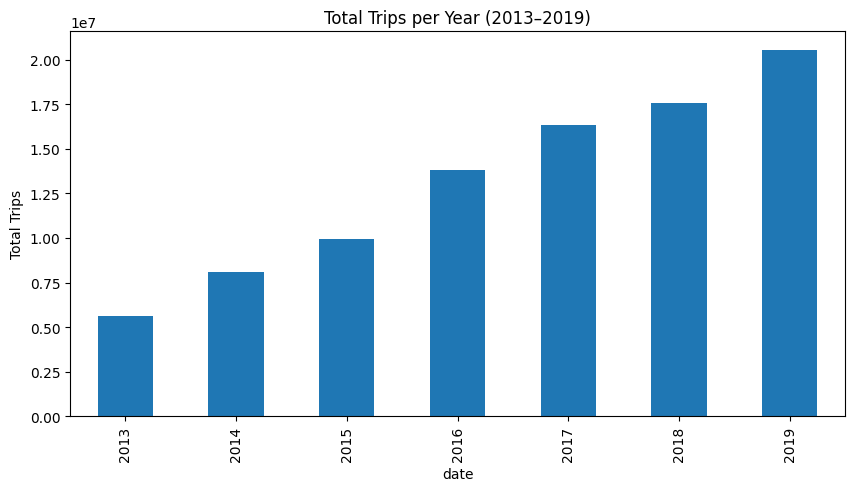

In [18]:
import matplotlib.pyplot as plt
df['date'] = pd.to_datetime(df['date'])
df_yearly = df.groupby(df['date'].dt.year)['trips'].sum()

df_yearly.plot(kind='bar', figsize=(10,5), title='Total Trips per Year (2013–2019)')
plt.ylabel('Total Trips')
plt.savefig('TotalTripsperYear.png', format='png', bbox_inches='tight')
plt.show()

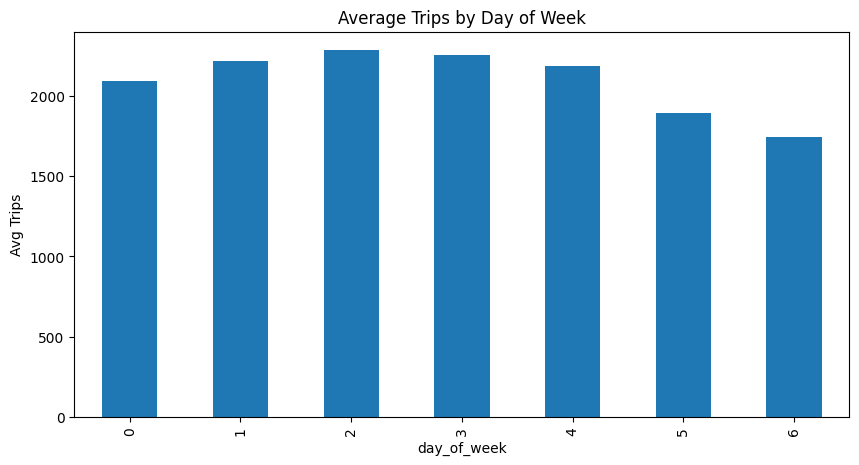

In [19]:
df_weekday = df.groupby('day_of_week')['trips'].mean()

df_weekday.plot(kind='bar', figsize=(10,5), title='Average Trips by Day of Week')
plt.ylabel('Avg Trips')
plt.savefig('AverageTripsbyDayofWeek.png', format='png', bbox_inches='tight')
plt.show()

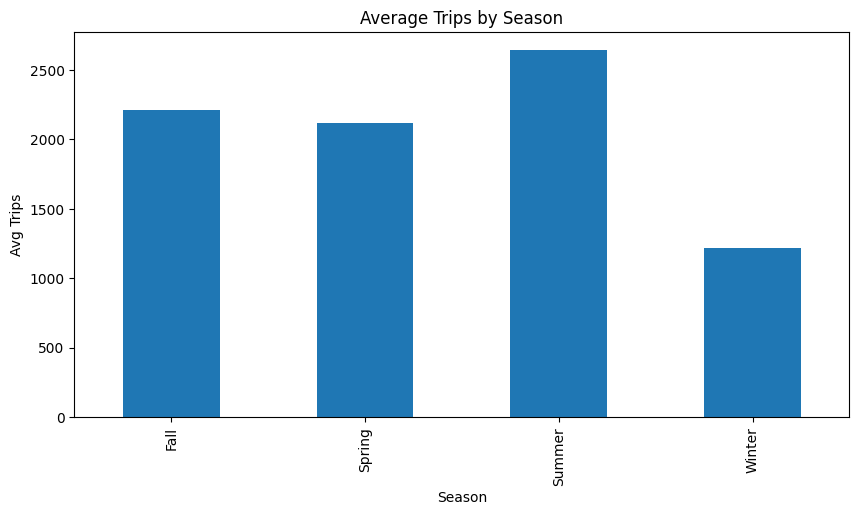

In [20]:
df_season = df.groupby('season')['trips'].mean()

df_season.plot(kind='bar', figsize=(10,5), title='Average Trips by Season')
plt.ylabel('Avg Trips')
plt.xlabel('Season')
plt.savefig('AverageTripsbySeason.png', format='png', bbox_inches='tight')
plt.show()

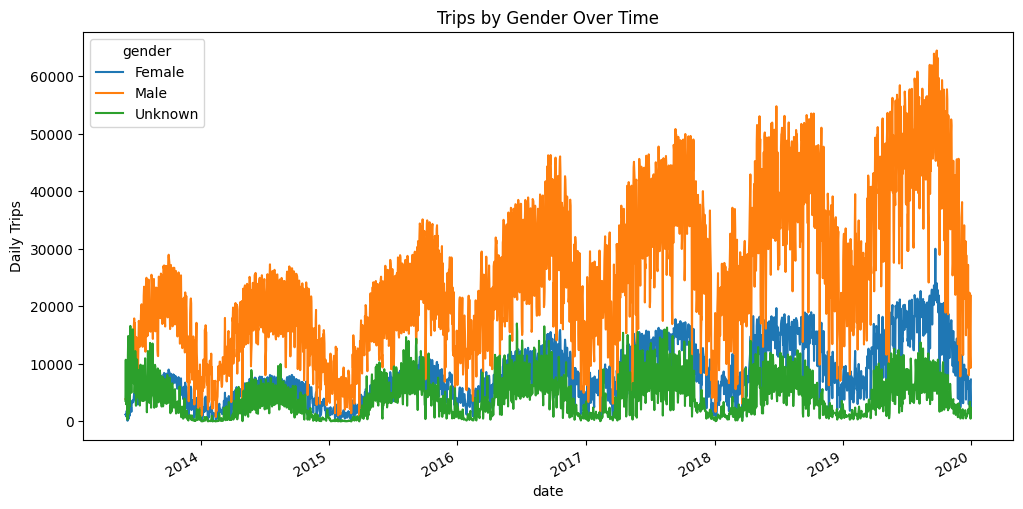

In [21]:
df_gender = df.groupby(['date', 'gender'])['trips'].sum().reset_index()

df_gender_pivot = df_gender.pivot(index='date', columns='gender', values='trips')

df_gender_pivot.plot(figsize=(12,6), title='Trips by Gender Over Time')
plt.ylabel('Daily Trips')
plt.savefig('TripsbyGenderOverTime.png', format='png', bbox_inches='tight')
plt.show()

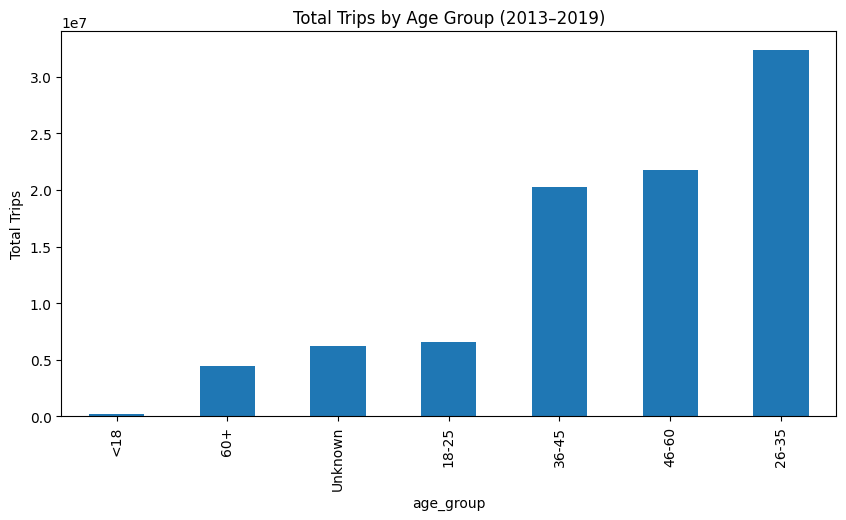

In [22]:
df_age = df.groupby('age_group')['trips'].sum().sort_values()
df_age.plot(kind='bar', figsize=(10,5), title='Total Trips by Age Group (2013–2019)')
plt.ylabel('Total Trips')
plt.savefig('TotalTripsbyAgeGroup.png', format='png', bbox_inches='tight')
plt.show()

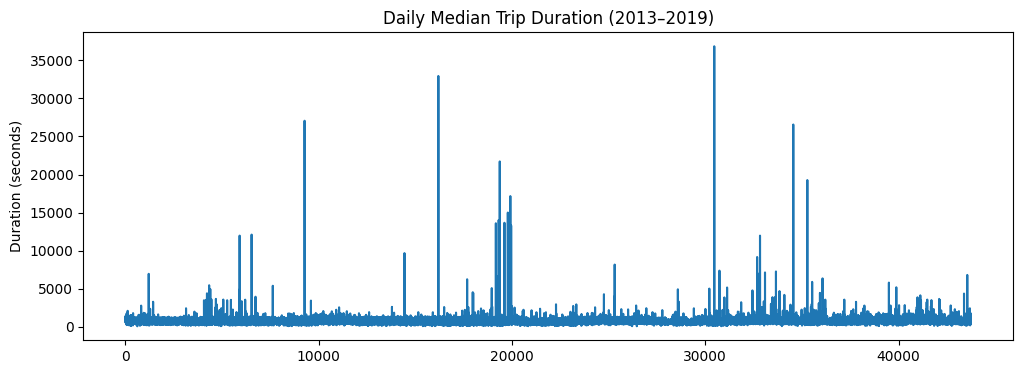

In [23]:
df['median_duration'].plot(figsize=(12,4), title='Daily Median Trip Duration (2013–2019)')
plt.ylabel('Duration (seconds)')
plt.show()

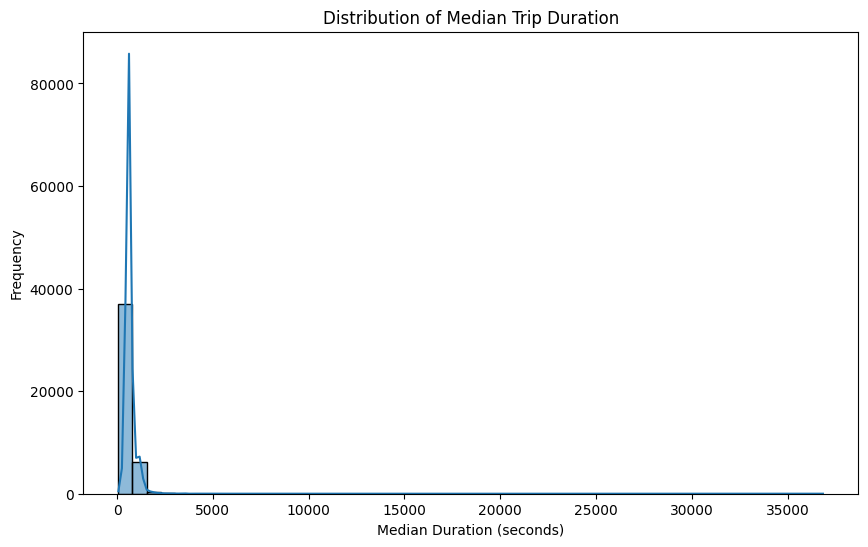

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['median_duration'], bins=50, kde=True)
plt.title('Distribution of Median Trip Duration')
plt.xlabel('Median Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [25]:
print(df['median_duration'].describe())

count    43740.000000
mean       668.422096
std        475.383679
min         64.000000
25%        527.000000
50%        603.000000
75%        711.000000
max      36849.500000
Name: median_duration, dtype: float64


<Axes: xlabel='tavg', ylabel='trips'>

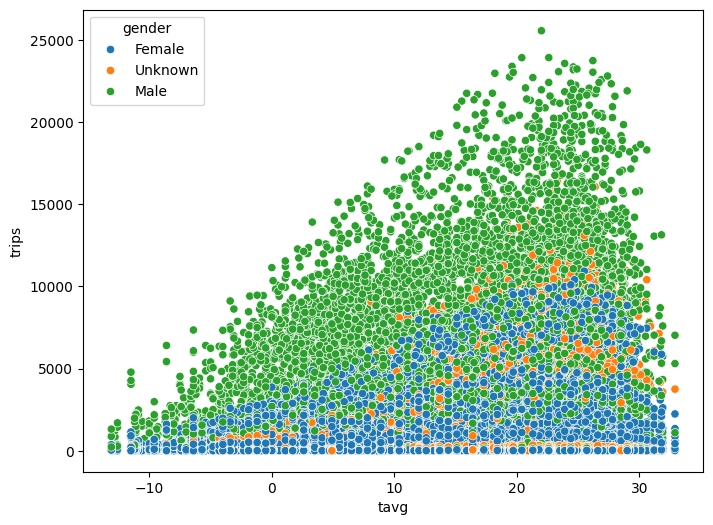

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='tavg', y='trips', hue='gender')

In [27]:
df['has_precipitation'] = df['prcp'] > 0
df.groupby(['has_precipitation', 'gender'])['trips'].mean()

has_precipitation  gender 
False              Female     1301.592474
                   Male       3752.525620
                   Unknown     993.046287
True               Female     1320.046611
                   Male       3924.109979
                   Unknown     626.571325
Name: trips, dtype: float64

In [28]:
df.groupby('age_group')['median_duration'].mean().sort_values()

,median_duration
age_group,
36-45,589.141169
26-35,613.707458
18-25,637.024032
60+,646.174301
46-60,655.053547
<18,736.907556
Unknown,884.492411


<Axes: xlabel='month', ylabel='day_of_week'>

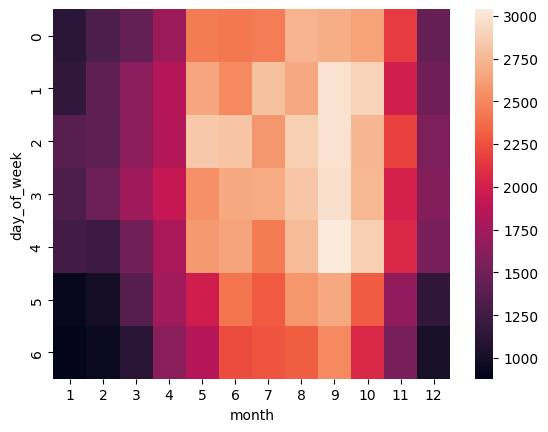

In [29]:
df['month'] = df['date'].dt.month
pivot = df.pivot_table(index='day_of_week', columns='month', values='trips', aggfunc='mean')
sns.heatmap(pivot)

In [30]:
df2 = pd.concat([df_train, df_test], ignore_index=True)
print(df2.nlargest(10, 'trips'))
print(df2.nsmallest(10, 'trips'))

           date   trips  median_duration  tavg  prcp  wspd   day_name  \
3792 2023-10-28  157619              703  21.9   0.0   8.0   Saturday   
3748 2023-09-14  156341              586  21.7   0.1   8.5   Thursday   
3754 2023-09-20  156056              584  18.3   0.0   8.2  Wednesday   
3746 2023-09-12  155864              586  22.9   0.1   8.2    Tuesday   
3755 2023-09-21  153130              587  18.0   0.0   8.4   Thursday   
3753 2023-09-19  152206              591  18.2   0.1   9.7    Tuesday   
3768 2023-10-04  150150              580  22.4   0.0   7.4  Wednesday   
3790 2023-10-26  150047              579  19.5   0.0   8.4   Thursday   
3756 2023-09-22  148903              581  18.2   0.0  10.0     Friday   
3769 2023-10-05  148470              580  20.3   0.0   7.1   Thursday   

      day_of_week  is_weekend  season  
3792            5           1    Fall  
3748            3           0  Summer  
3754            2           0  Summer  
3746            1           0  Summe

<Axes: xlabel='date'>

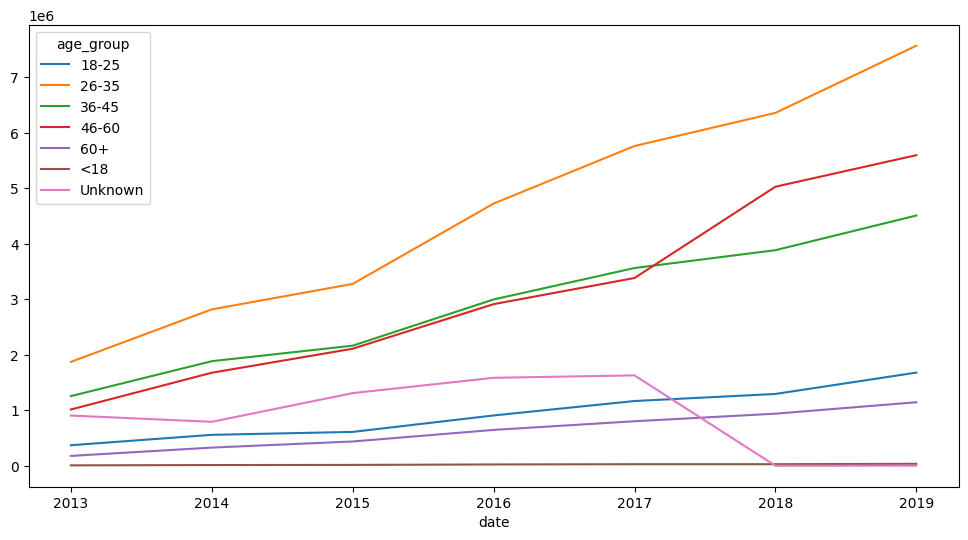

In [31]:
df_age_year = df.groupby([df['date'].dt.year, 'age_group'])['trips'].sum().unstack()
df_age_year.plot(figsize=(12,6))

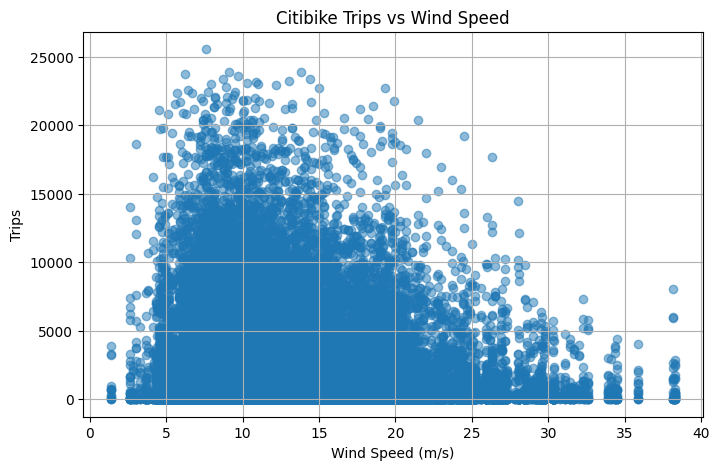

In [32]:
plt.figure(figsize=(8,5))
plt.scatter(df['wspd'], df['trips'], alpha=0.5)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Trips")
plt.title("Citibike Trips vs Wind Speed")
plt.grid(True)
plt.savefig('CitibikeTripsvsWindSpeed.png', format='png', bbox_inches='tight')
plt.show()

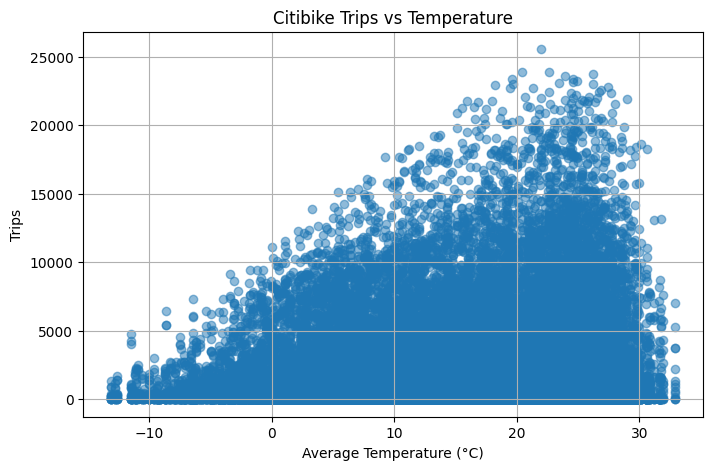

In [33]:
plt.figure(figsize=(8,5))
plt.scatter(df['tavg'], df['trips'], alpha=0.5)
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Trips")
plt.title("Citibike Trips vs Temperature")
plt.grid(True)
plt.savefig('CitibikeTripsvsTemperature.png', format='png', bbox_inches='tight')
plt.show()

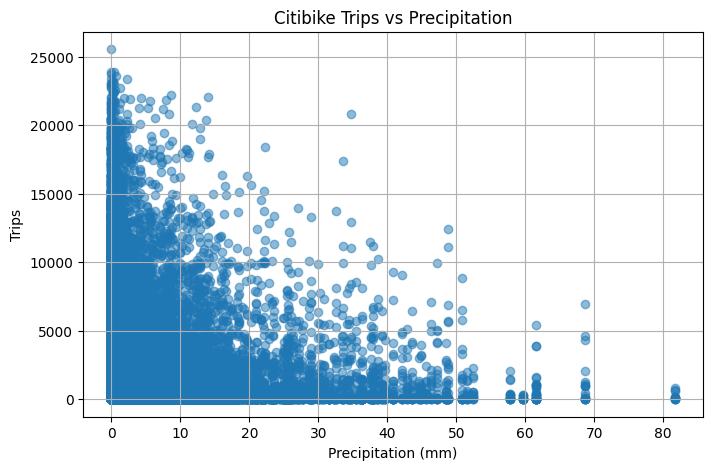

In [34]:
plt.figure(figsize=(8,5))
plt.scatter(df['prcp'], df['trips'], alpha=0.5)
plt.xlabel("Precipitation (mm)")
plt.ylabel("Trips")
plt.title("Citibike Trips vs Precipitation")
plt.grid(True)
plt.savefig('CitibikeTripsvsPrecipitation.png', format='png', bbox_inches='tight')
plt.show()

In [35]:
df[['subscribers', 'customers']].sum()


,0
subscribers,80787420
customers,11083073


In [36]:
df_coco_clean = df[
    df['coco'].notna() &
    (df['weather'] != 'Unknown')
].copy()

df_coco_clean.groupby(['coco', 'weather']).agg(
    days=('date', 'count'),
    total_trips=('trips', 'sum'),
    avg_trips=('trips', 'mean')
)

,,days,total_trips,avg_trips
coco,weather,,,
2.0,Fair,2727,7665940,2811.125779
3.0,Cloudy,4137,12003041,2901.387721
4.0,Overcast,1322,3218502,2434.570348
5.0,Fog,580,971961,1675.794828
7.0,Light rain,2604,5461013,2097.163210
8.0,Rain,785,1729246,2202.861146
9.0,Heavy rain,194,369944,1906.927835
10.0,Freezing rain,16,5881,367.562500
13.0,Heavy sleet,18,24729,1373.833333


In [37]:
df.groupby('coco')['trips'].agg(['count', 'sum', 'mean'])


,count,sum,mean
coco,,,
2.0,3711,10174069,2741.597683
3.0,5429,14752475,2717.346657
4.0,1769,4127476,2333.225551
5.0,2066,4342860,2102.061955
7.0,6812,14038021,2060.778186
8.0,825,1810008,2193.949091
9.0,252,492105,1952.797619
10.0,16,5881,367.562500
12.0,54,65847,1219.388889


In [38]:
df.groupby('gender')['trips'].sum()

,trips
gender,
Female,20475661
Male,62017889
Unknown,9376943


In [39]:
df.groupby('age_group')['trips'].sum()

,trips
age_group,
18-25,6596749
26-35,32387400
36-45,20267913
46-60,21729126
60+,4487393
<18,165767
Unknown,6236145


In [40]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [41]:
df.groupby('year')['trips'].sum()


,trips
year,
2013,5614254
2014,8080663
2015,9935377
2016,13806220
2017,16344585
2018,17543815
2019,20545579


In [42]:
df.groupby('month')['trips'].sum()


,trips
month,
1,3504424
2,3552553
3,4726701
4,6723307
5,8310706
6,9723329
7,10106159
8,10837749
9,11125399


In [43]:
df.groupby(['year', 'month'])['trips'].sum().unstack()


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2013,NaN,NaN,NaN,NaN,NaN,577358.0,843379.0,1001921.0,1034320.0,1037672.0,675712.0,443892.0
2014,300348.0,224621.0,439117.0,670780.0,866117.0,936880.0,968842.0,963489.0,953785.0,828569.0,529117.0,398998.0
2015,285552.0,196929.0,341780.0,652272.0,961804.0,941110.0,1085545.0,1178823.0,1289281.0,1211686.0,986826.0,803769.0
2016,509246.0,560591.0,919449.0,1012720.0,1211785.0,1459983.0,1379846.0,1557416.0,1648629.0,1555697.0,1184197.0,806661.0
2017,723346.0,783948.0,722382.0,1315089.0,1522962.0,1731096.0,1735082.0,1815802.0,1877575.0,1897130.0,1330335.0,889838.0
2018,718870.0,842959.0,976481.0,1307283.0,1824105.0,1952266.0,1913070.0,1976662.0,1877500.0,1878334.0,1260056.0,1016229.0
2019,967062.0,943505.0,1327492.0,1765163.0,1923933.0,2124636.0,2180395.0,2343636.0,2444309.0,2092086.0,1478431.0,954931.0


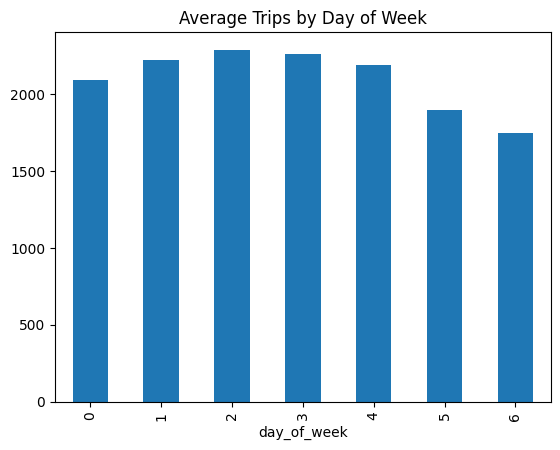

In [44]:
df.groupby('day_of_week')['trips'].mean().plot(kind='bar')
plt.title("Average Trips by Day of Week")
plt.show()

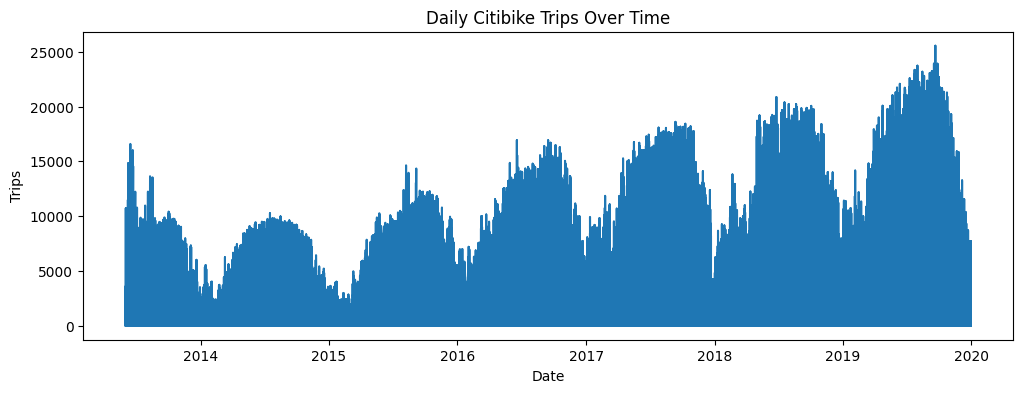

In [45]:
plt.figure(figsize=(12,4))
plt.plot(df['date'], df['trips'])
plt.title("Daily Citibike Trips Over Time")
plt.xlabel("Date")
plt.ylabel("Trips")
plt.savefig('DailyCitibikeTripsOverTime.png', format='png', bbox_inches='tight')
plt.show()

# Collaborators code (changed for the presentation)

## Alan

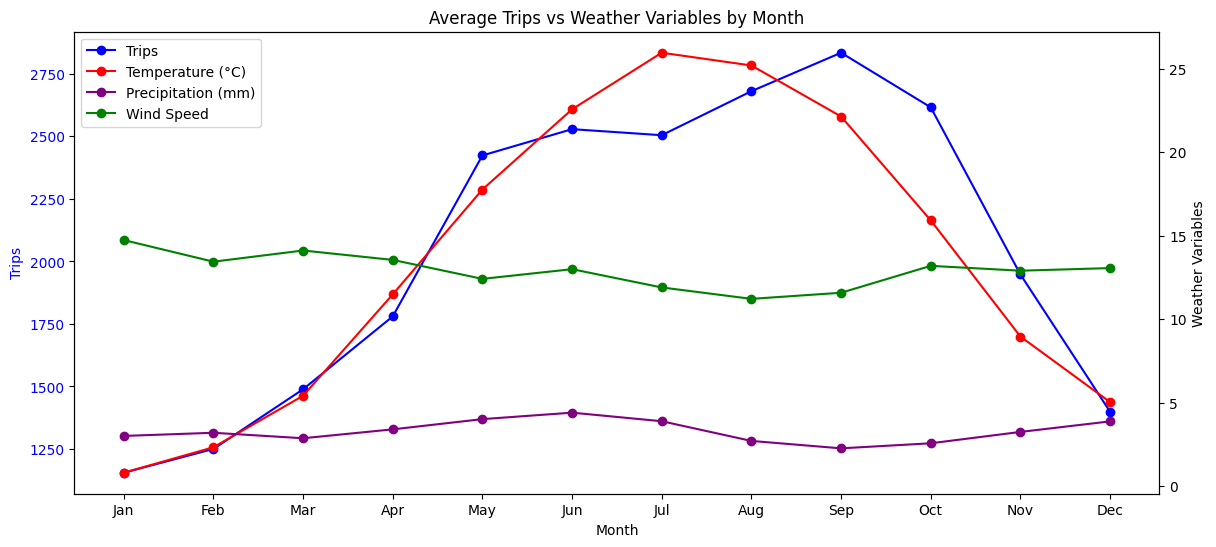

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'])

# Extract month
df['month'] = df['date'].dt.month

# Aggregate by month across all years
monthly_avg = df.groupby('month').agg({
    'trips': 'mean',
    'tavg': 'mean',
    'prcp': 'mean',
    'wspd': 'mean'
}).reset_index()

# Month names for x-axis
monthly_avg['month_name'] = monthly_avg['month'].apply(lambda x: calendar.month_abbr[x])

# Plot
fig, ax1 = plt.subplots(figsize=(14,6))

# Trips on primary y-axis
ax1.plot(monthly_avg['month_name'], monthly_avg['trips'], label='Trips', color='blue', marker='o')
ax1.set_xlabel('Month')
ax1.set_ylabel('Trips', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Temperature, Precipitation, Wind Speed on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(monthly_avg['month_name'], monthly_avg['tavg'], label='Temperature (°C)', color='red', marker='o')
ax2.plot(monthly_avg['month_name'], monthly_avg['prcp'], label='Precipitation (mm)', color='purple', marker='o')
ax2.plot(monthly_avg['month_name'], monthly_avg['wspd'], label='Wind Speed', color='green', marker='o')
ax2.set_ylabel('Weather Variables', color='black')  # Generic label
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Average Trips vs Weather Variables by Month')
plt.savefig('AverageTripsvsWeatherVariablesbyMonth.png', format='png', bbox_inches='tight')
plt.show()

In [51]:
import pandas as pd

# Ensure datetime
df['date'] = pd.to_datetime(df['date'])

# Filter for 2019
df_2019 = df[df['date'].dt.year == 2019]

# Compute average DAILY trips for each month
avg_monthly_2019 = (
    df_2019
    .groupby(df_2019['date'].dt.month)['trips']
    .mean()
    .reset_index()
)

# Add month names
avg_monthly_2019['month_name'] = avg_monthly_2019['date'].apply(
    lambda x: pd.to_datetime(str(x), format='%m').strftime('%b')
)

print(avg_monthly_2019)


    date        trips month_name
0      1  1639.088136        Jan
1      2  1731.201835        Feb
2      3  2117.212121        Mar
3      4  2860.880065        Apr
4      5  3025.051887        May
5      6  3309.401869        Jun
6      7  3230.214815        Jul
7      8  3492.751118        Aug
8      9  3743.199081        Sep
9     10  3184.301370        Oct
10    11  2407.868078        Nov
11    12  1545.195793        Dec


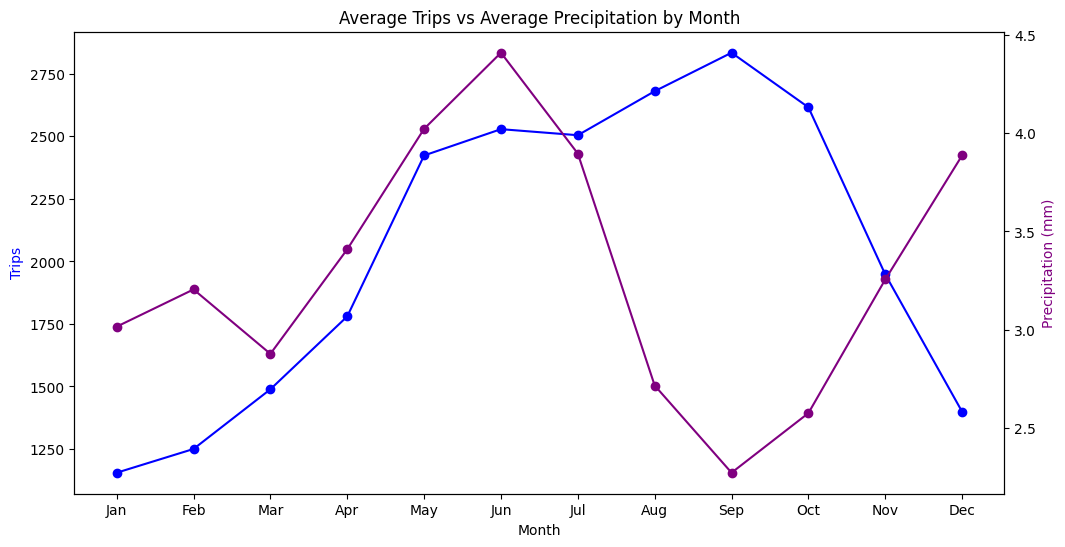

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import os

# Load the df DataFrame to make this cell runnable independently
df = pd.read_csv(os.path.join(project_folder_path, "training_data/merged_citibike_weather.csv"))

# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'])

# Extract month
df['month'] = df['date'].dt.month

# Aggregate by month across all years
monthly_avg = df.groupby('month').agg({
    'trips': 'mean',
    'prcp': 'mean'
}).reset_index()

# Convert month numbers to names
monthly_avg['month_name'] = monthly_avg['month'].apply(lambda x: calendar.month_abbr[x])

# Plot
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(monthly_avg['month_name'], monthly_avg['trips'], label='Trips', color='blue', marker='o')
ax1.set_xlabel('Month')
ax1.set_ylabel('Trips', color='blue')

ax2 = ax1.twinx()
ax2.plot(monthly_avg['month_name'], monthly_avg['prcp'], label='Precipitation (mm)', color='purple', marker='o')
ax2.set_ylabel('Precipitation (mm)', color='purple')

plt.title('Average Trips vs Average Precipitation by Month')
plt.show()

## Erik

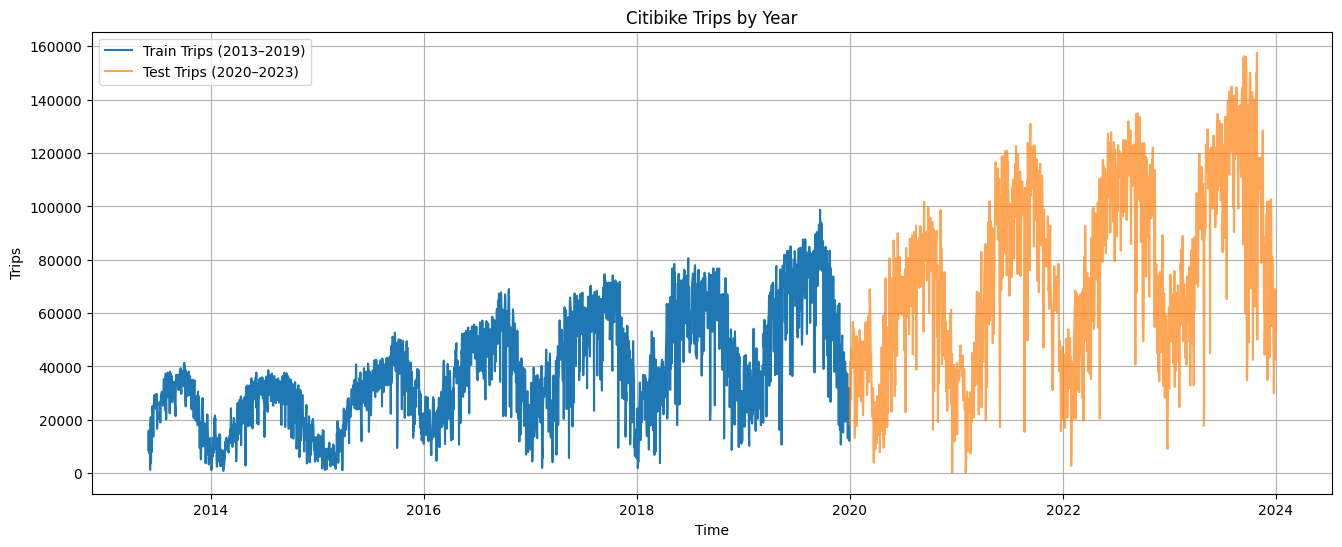

In [48]:
plt.figure(figsize=(16,6))
plt.plot(df_train['date'], df_train['trips'], label="Train Trips (2013–2019)")
plt.plot(df_test['date'], df_test['trips'], label="Test Trips (2020–2023)", alpha=0.7)
plt.title("Citibike Trips by Year")
plt.xlabel("Time")
plt.ylabel("Trips")
plt.legend()
plt.grid(True)
plt.savefig('CitibikeTripsbyYear.png', format='png', bbox_inches='tight')
plt.show()

/tmp/ipython-input-4010189929.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rain_avg = df_train.groupby("rain_bin")["trips"].mean()


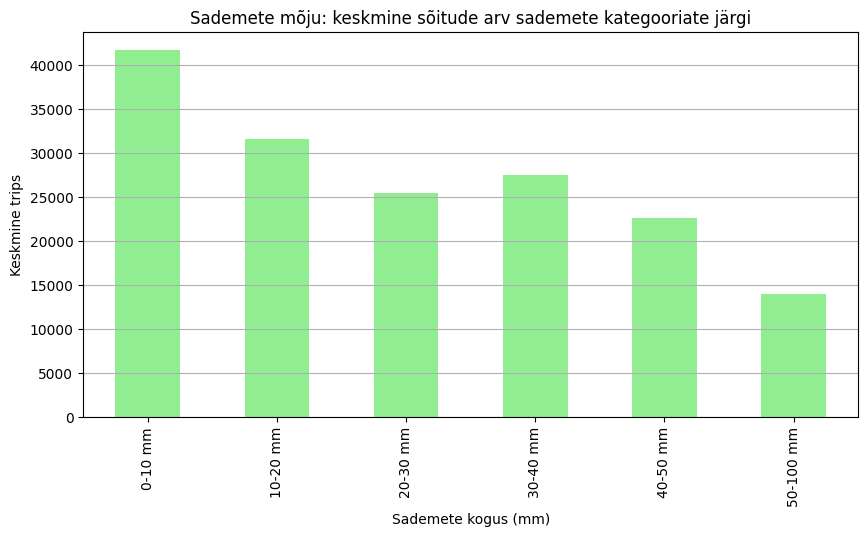

In [49]:
df_train['rain_bin'] = pd.cut(
    df_train['prcp'],
    bins=[0, 10, 20, 30, 40, 50, 100],
    labels=['0-10 mm', '10-20 mm', '20-30 mm', '30-40 mm', '40-50 mm', '50-100 mm'],
    right=True # explicitly set to True for (lower, upper] intervals
)

rain_avg = df_train.groupby("rain_bin")["trips"].mean()

plt.figure(figsize=(10,5))
rain_avg.plot(kind="bar", color="lightgreen")
plt.title("Sademete mõju: keskmine sõitude arv sademete kategooriate järgi")
plt.xlabel("Sademete kogus (mm)")
plt.ylabel("Keskmine trips")
plt.grid(axis='y')
plt.show()

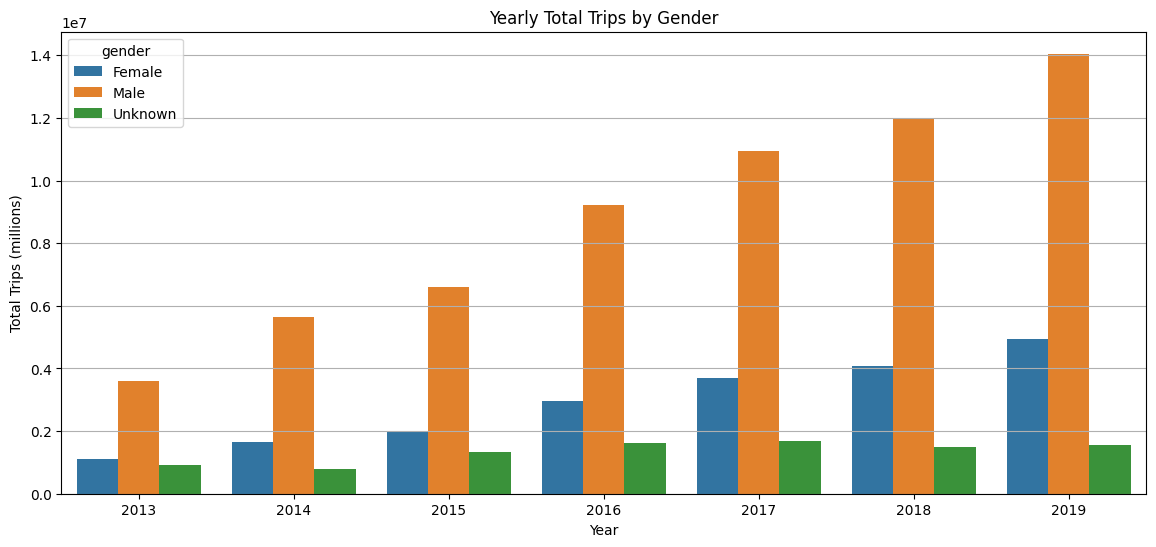

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure date is datetime
df1['date'] = pd.to_datetime(df1['date'])

# Extract year
df1['year'] = df1['date'].dt.year

# Total trips per year per gender
df_year_gender = df1.groupby(['year', 'gender'])['trips'].sum().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(data=df_year_gender, x='year', y='trips', hue='gender')
plt.title("Yearly Total Trips by Gender")
plt.xlabel("Year")
plt.ylabel("Total Trips (millions)")
plt.grid(axis='y')
plt.show()